In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [4]:
home_dir = '/Users/dbao/google_drive_db'+'/road_construction/data/2022_online/'
map_dir = 'active_map/'
data_dir  = 'data/preprocessed'
out_dir = home_dir + 'figures/figures_all/'
R_out_dir = home_dir + 'R_analysis_data/'

In [5]:
data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')

## individual number of connected cities

In [6]:
numCity_basic = data_puzzle_level[data_puzzle_level['condition']==0].groupby(['subjects'])['numCities'].mean()
numCity_undo = data_puzzle_level[data_puzzle_level['condition']==1].groupby(['subjects'])['numCities'].mean()
mas =  np.mean(data_puzzle_level['mas'])

<IPython.core.display.Javascript object>


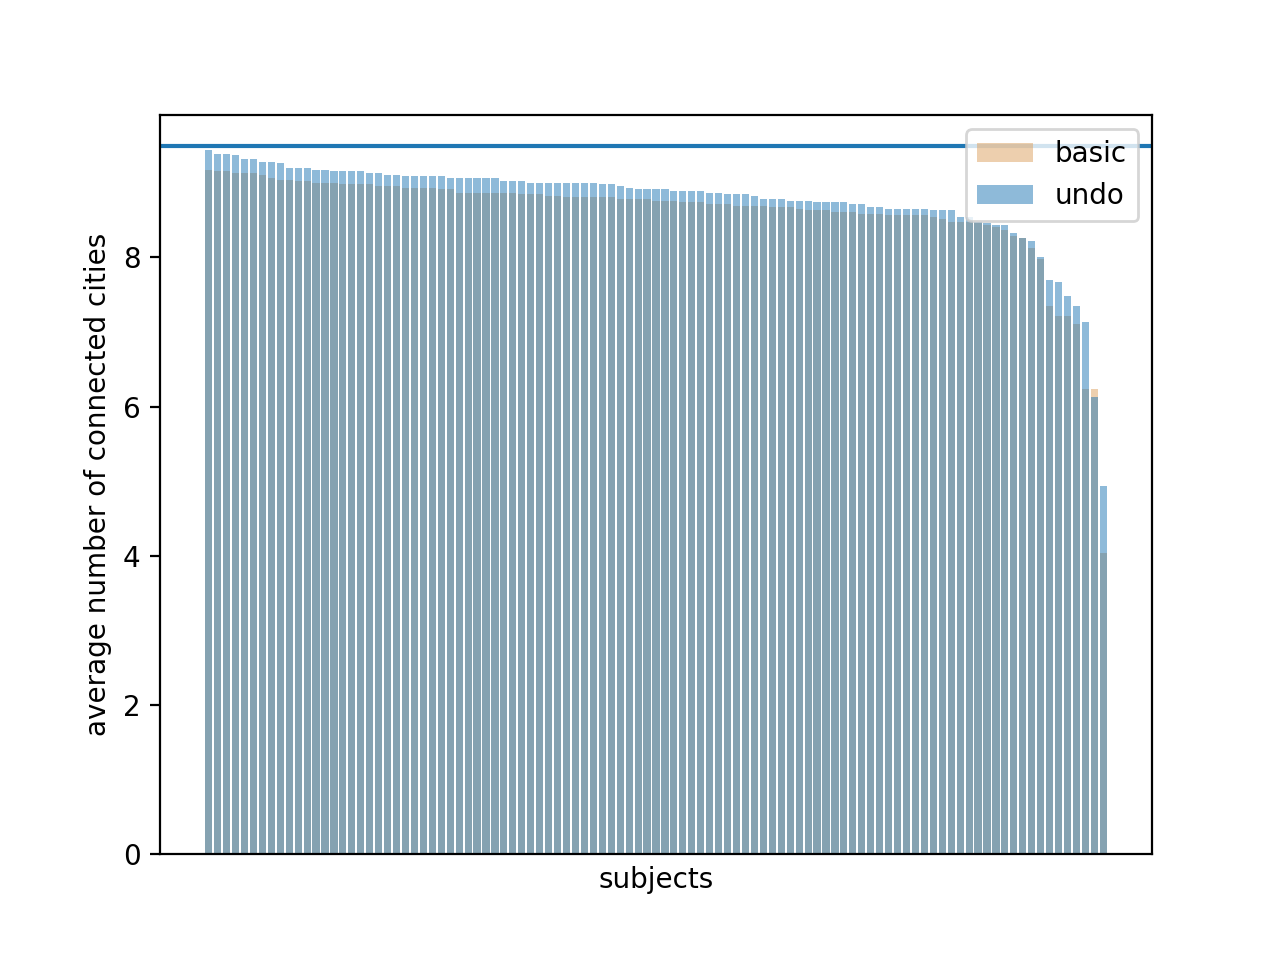

In [7]:
%matplotlib notebook

n_sub = len(numCity_basic)
fig0, ax0 = plt.subplots()
subInd = [x+1 for x in sorted(range(len(numCity_basic)),key=lambda k:list(numCity_basic)[k])]
sorted_numCity_undo = [numCity_undo[x] for x in subInd]
ax0.bar(list(range(1,n_sub+1)),sorted(numCity_basic),color = "#dda15e",alpha=0.5,label='basic')
ax0.bar(list(range(1,n_sub+1)),sorted(sorted_numCity_undo),alpha=0.5,label='undo')
ax0.axhline(mas)
ax0.invert_xaxis()
ax0.set_xticks([])
# ax0.set_xticklabels(subInd,{'fontsize': 6})
ax0.set_xlabel("subjects")
ax0.set_ylabel("average number of connected cities")
ax0.legend()
# fig0.suptitle('Relative change of count of defer in group condition compared to self condition')
# print('the mean of relative change in group level is:'+ str(statistics.mean(groupDeferRate)))
plt.show()
fig0.savefig(out_dir + 'connected_individual.pdf', dpi=600, bbox_inches='tight')

## individual counts of undoing

In [8]:
num_undo = data_puzzle_level[data_puzzle_level['condition']==1].groupby(['subjects'])['numUNDO'].mean()

<IPython.core.display.Javascript object>


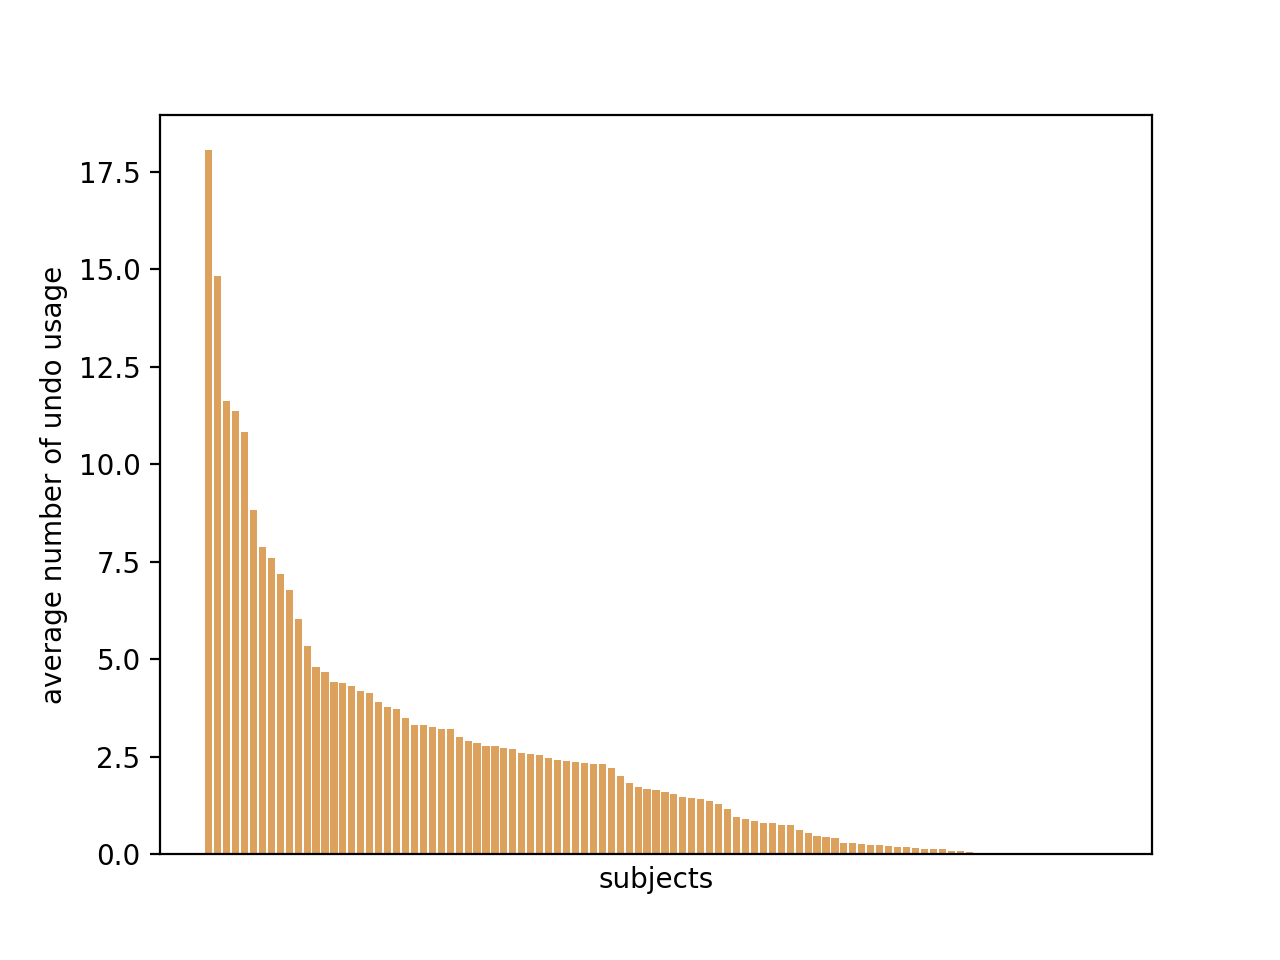

[]

In [12]:
%matplotlib notebook

n_sub = len(num_undo)
fig0, ax0 = plt.subplots()
subInd = [x+1 for x in sorted(range(len(num_undo)),key=lambda k:list(num_undo)[k])]
ax0.bar(list(range(1,n_sub+1)),sorted(num_undo),color = "#dda15e")
ax0.set_xlabel("subjects")
ax0.set_ylabel("average number of undo usage")
ax0.invert_xaxis()
ax0.set_xticks([])

## individual counts of full undoing

In [10]:
numFullUndo = data_puzzle_level[data_puzzle_level['condition']==1].groupby(['subjects'])['numFullUndo'].mean()

<IPython.core.display.Javascript object>


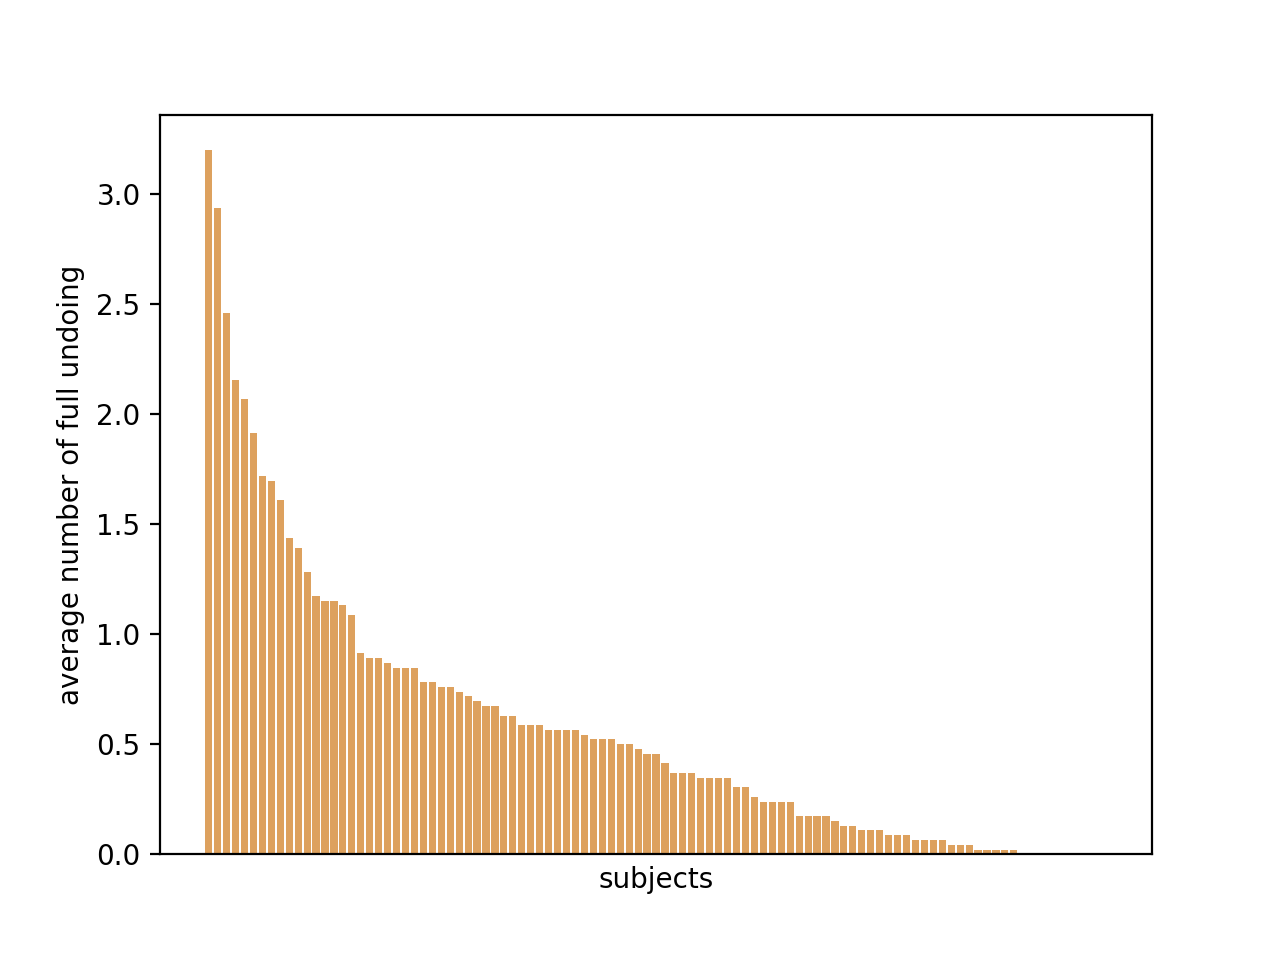

In [13]:
%matplotlib notebook

n_sub = len(numFullUndo)
fig0, ax0 = plt.subplots()
subInd = [x+1 for x in sorted(range(len(numFullUndo)),key=lambda k:list(numFullUndo)[k])]
ax0.bar(list(range(1,n_sub+1)),sorted(numFullUndo),color = "#dda15e")
ax0.set_xlabel("subjects")
ax0.set_ylabel("average number of full undoing")
ax0.invert_xaxis()
ax0.set_xticks([])
fig0.savefig(out_dir + 'full_undoing_individual.pdf', dpi=600, bbox_inches='tight')